In [2]:
import torch
import numpy as np

In [10]:
np_data = np.arange(9).reshape((3, 3))
data = np.array(np_data)
torch_data = torch.from_numpy(np_data)
print(
    '\n numpy', np_data,
    '\n torch', torch_data,
)
tensor = torch.FloatTensor(data)
# tensor.dot(tensor)


 numpy [[0 1 2]
 [3 4 5]
 [6 7 8]] 
 torch tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


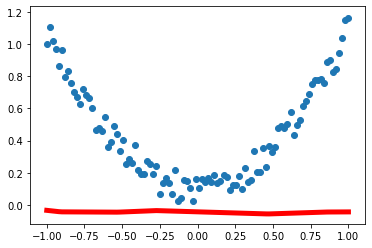

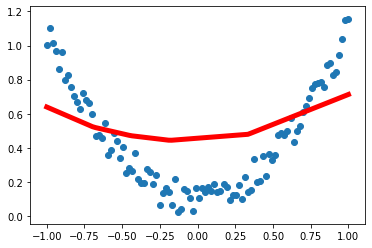

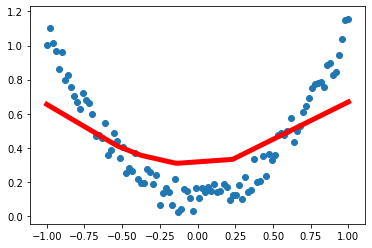

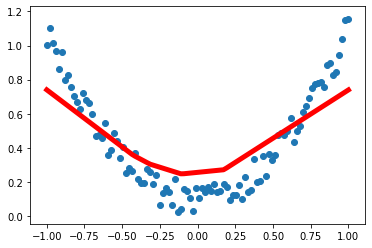

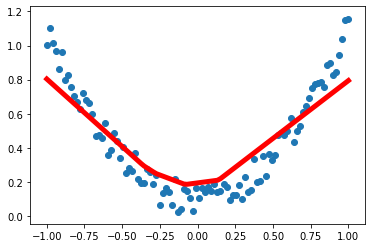

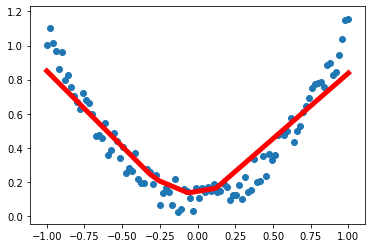

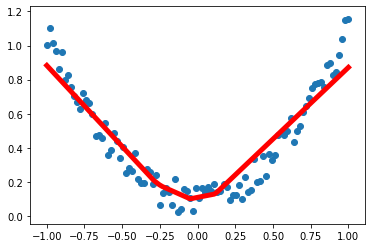

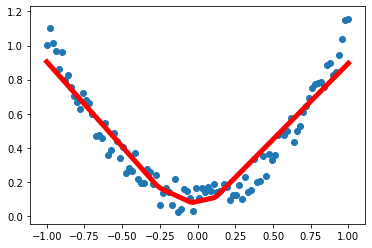

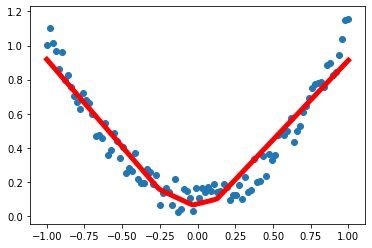

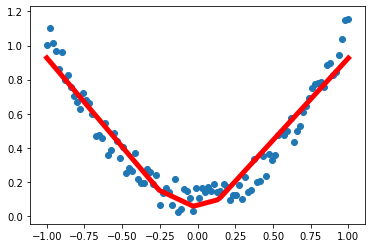

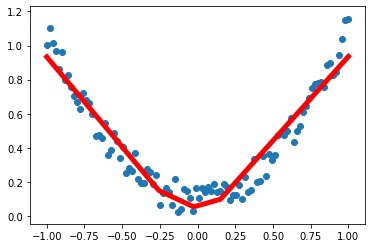

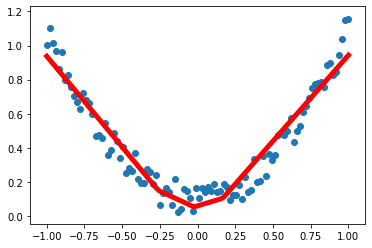

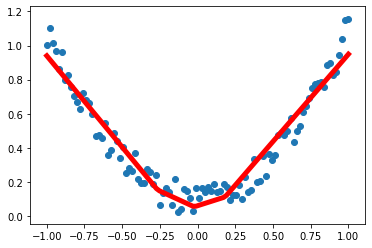

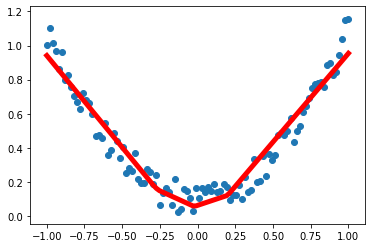

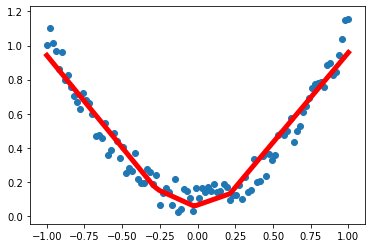

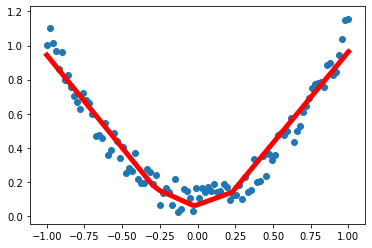

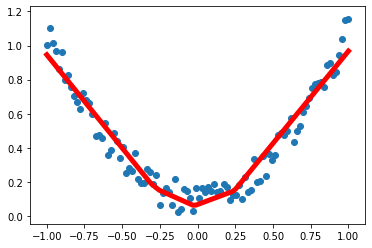

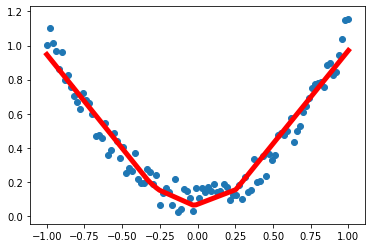

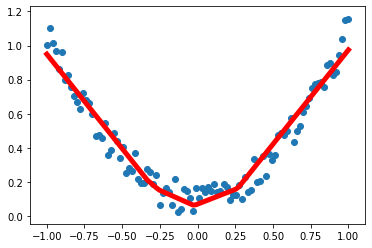

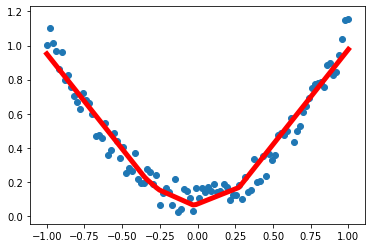

In [17]:
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.nn.functional as F
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim = 1)
y = x.pow(2) + 0.2*torch.rand(x.size())

x, y = Variable(x), Variable(y)
# plt.scatter(x.data.numpy(), y.data.numpy())
# plt.show()

class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_features, n_hidden)   # one hidden layer, #feat, # hidden percepton, relu > 0
        self.predict = torch.nn.Linear(n_hidden, n_output)
        
        pass
    # construct the net
    def forward(self, x):
        x = F.relu(self.hidden(x))  #激励函数  嵌套住隐藏层输出的信息
        x = self.predict(x)
        return x
        pass

net = Net(1, 10, 1)
print(net)

plt.ion()
plt.show()

optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()

for t in range(100):
    prediction = net(x)
    loss = loss_func(prediction, y)
    optimizer.zero_grad()   # 梯度先降为0
    loss.backward()       # cal the grad of nodes
    optimizer.step()      
    
    if t % 5 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
#         plt.text(0.5, 0, 'Loss = %.4f' % loss.data[0], fontdict = {'size' : 20, 'color': 'red'})
        plt.pause(0.1)
plt.ioff()
plt.show()
    

action space: Discrete(4)
observ space: Box(8,)
QNet_MLP initialization: num_in=9, obs_shape=(9,)
---episode 0---
